# Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)

с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler. Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [25]:
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

%matplotlib inline
warnings.filterwarnings('ignore')

boston = load_boston()
# print(boston["DESCR"])

x = pd.DataFrame(boston["data"], columns=boston["feature_names"])
y = pd.DataFrame(boston["target"], columns=["price"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

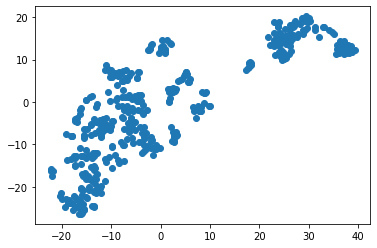

In [37]:
scaler = StandardScaler(with_mean=False)

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

x_train_tsne = tsne.fit_transform(x_train_scaled)

plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])

plt.show()

# Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


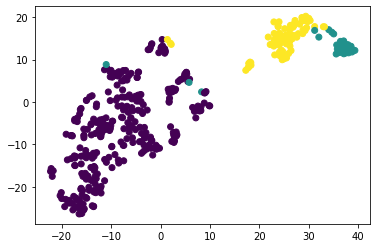

Кластер 0: price    25.168687
dtype: float64
Кластер 1: price    13.196774
dtype: float64
Кластер 2: price    17.442105
dtype: float64


Кластер 0: 0.40486282828282844
Кластер 1: 14.360380322580648
Кластер 2: 11.745661842105266


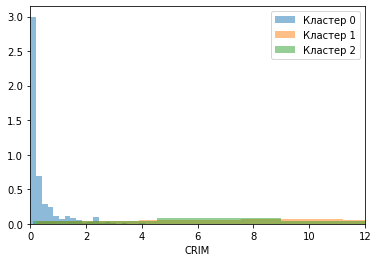

In [69]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(x_train)

plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=labels_train)

plt.show()

clusters = []
for i in range(3):
    plt.hist(y_train[labels_train == i], bins=20, density=True, alpha=0.5)
    print(f"Кластер {i}: {y_train[labels_train == i].mean()}")
    clusters.append(f"Кластер {i}")

plt.xlim(0, 12)
plt.legend(clusters)
plt.xlabel('Price')

plt.show()

for i in range(3):
    plt.hist(x_train.loc[labels_train == i, 'CRIM'], bins=20, density=True, alpha=0.5)
    print(f"Кластер {i}: {x_train.loc[labels_train == i, 'CRIM'].mean()}")

plt.xlim(0, 12)
plt.legend(clusters)
plt.xlabel('CRIM')

plt.show()

# * Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


Кластер 0: price    12.814286
dtype: float64
Кластер 1: price    23.911594
dtype: float64
Кластер 2: price    17.392308
dtype: float64


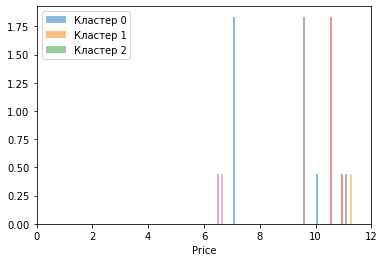

Кластер 0: 19.021665714285714
Кластер 1: 0.2464211594202899
Кластер 2: 8.469301923076923


In [67]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train_test = kmeans.fit_predict(x_test)

clusters = []
for i in range(3):
    plt.hist(y_test[labels_train_test == i], bins=20, density=True, alpha=0.5)
    print(f"Кластер {i}: {y_test[labels_train_test == i].mean()}")
    clusters.append(f"Кластер {i}")

plt.xlim(0, 12)
plt.legend(clusters)
plt.xlabel('Price')

plt.show()

for i in range(3):
    plt.hist(x_test.loc[labels_train_test == i, 'CRIM'], bins=20, density=True, alpha=0.5)
    print(f"Кластер {i}: {x_test.loc[labels_train_test == i, 'CRIM'].mean()}")

plt.xlim(0, 12)
plt.legend(clusters)
plt.xlabel('CRIM')

plt.show()